In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd # for working with data
%config InlineBackend.figure_format = "svg"

# Introduction




 <!-- <a href = "https://www.bostonglobe.com/2020/06/11/opinion/statistical-paradox-police-killings/"> The statistical paradox of police killings </a> -->



The basic idea of a linear regression (or really any regression model) is that we make some observation ${\bf y} = (y_1,y_2,\dots,y_N)^T$ of a **response variable** corresponding to another set of observation ${\bf x} = (x_1,\dots,x_N)^T$ of **predictor variables**. What we are interested in is the relationship between the values $x_i$ and $y_i$. The goal is often, but not always, to make predictions about the value of $y$ corresponding to some $x$ we did not measure.  

In order to make any sense of the data, we need to make some assumptions about how the data was generated. Whatever assumptions we make constitute our **model**. For a linear regression model with one predictor variable, we will *assume* that the relationship between $x$ and $y$ is linear. *on average*. This means that for data with a given values of $x$, the average, or expected value of $y$ is $y = ax+b$ where $a$ and $b$ are our slope and intercept. However, it is never the case that all the $y$ points call exactly on a line, thus, we add some **noise**, denoted $\epsilon_i$, to our model to obtain:
\begin{equation}
y_i = ax_i + b + \epsilon_i
\end{equation}
Importantly, $a$ and $b$ are the same for every $x$ and $y$ point, but $\epsilon_i$ is different. We therefore need to decide how model this source of noise. It is common (but not always correct) to assume $\epsilon$ are independent and normaly distributed random variables for each $x$, with mean $0$ and variance $\sigma^2$. Sometimes we write this as 
\begin{equation}
\epsilon \sim N(0,\sigma).
\end{equation} We will discuss this assumption in greater detial throughout the course. For now, think of it as saying "for a given $x$ value the $y$ values are on average going to fall on a line $ax + b$, but with some variation around that.
  
NOTE: Sometimes people refer to $\epsilon$ as an error. This can be misleading. While there may be some **measurment error** which affects our observed values, the noise may also result from non-measurment error related randomness. 

The process of **fitting** the model to the data yields estimates of these paramater values $\hat{a}$, $\hat{b}$ and $\hat{\sigma}^2$ (we often use the $\hat{\cdot}$ to denote a fitted value). Once we have these values, we can make predictions using the fitted model: 
\begin{equation}
y = \hat{a}x + \hat{b} + \epsilon
\end{equation}
for values of $x$ that our not in our observed data set. 

In this section, we will answer the following questions:
* How do we estimate $\hat{a}$, $\hat{b}$ and 
$\hat{\sigma}^2$ from the data? We will mostly be doing this with a computer, but it's good to understand the theory (the equations) as well. 
* Once we fit the model, how do we quantify the uncertianty in our estimates of the paramaters? How do we quantify our uncertainty in the predictions we make from the model? The answer to this question wille eventually lead us to Bayesian statistics.




# Performing a linear regression on fake data



 Whenever I learn a new statistical technique, I often like to start with fake, or simulated data. When we use simulated data, we know the growth truth and can therefore see exactly what aspects of the data the method can and cannot help us understand. Generating fake data also forces us to make our assumptions explicit. For now, let's generate fake data which obeys the assumptions of a linear regression (what are these assumptions?)




In [ ]:
# we already saw this in the first python notebook
# but here is a fake linear regression data
# (the reason we sort the x values is just to make plots 
# look nicer later on)
x = np.sort(np.random.normal(0,0.2,100))
a = 0.2  # the slope
b = 2. # the intercept
sigma = 0.1
y = a*x + b + np.random.normal(0,sigma,len(x)) 

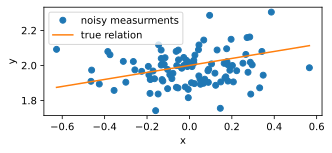

In [ ]:
fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="noisy measurments")
ax.plot(x,a*x + b,"-",label="true relation")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [ ]:
# we will use the statsmodels package imported above to fit the linear regression 
# the command is sm.OLS(y, X), you can check out the help by typing help(sm.OLS)
# and you'll see there is a lot going on, the import thing is the parameters.
 
# We need to give OLS y, the observed or response variable, and x, the input variable. 
# but it likes the input to be in a matrix form where each row contains the numbers 
# that appear in front of the coefficents a,b
X = sm.add_constant(x)

In [ ]:
 # this first command creates the "model" object, which is all the information 
 # about the data and the statistical model (linear regression)
 # (compare this to r code in the textbook)
 model= sm.OLS(y,X) 
 # and this commend actually does the computations which give the results
results = model.fit()

NOTE: The function `OLS` uses maximum likelihood as described in Chapter 8 of the textbook. This is constrast to the Bayesian methods used in Chapter's 6 and 8. We will learn how to approach this problem from a Bayesian perspective later on, but for now, note that the results are slightly different. 

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.364
Date:                Fri, 24 Sep 2021   Prob (F-statistic):              0.127
Time:                        20:05:28   Log-Likelihood:                 93.961
No. Observations:                 100   AIC:                            -183.9
Df Residuals:                      98   BIC:                            -178.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9808      0.010    207.379      0.0

There is lot going on here, but the first thing to nose is the parameters ``cont`` (the intercept $b$) and ``x1`` (the slope $a$). The column ``std err`` displays the standard deviation of the estimates. These represent **confidence intervals** and roughly speaking, it means $90$% chance the  expect the "true" value to be with in $\pm$ $2\times$ ``std err`` of the esetimates coefficents. (Are the values in this interval for your regression coefficents?) 

We can get $a$ and $b$ using the params attribute of results:

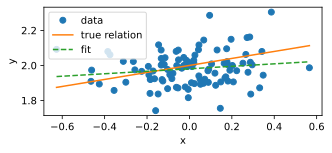

In [ ]:
b_fit,a_fit = results.params
# now let's plot it and compare to the data
fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="data")
ax.plot(x,a*x + b,"-",label="true relation")
ax.plot(x,a_fit*x + b_fit,"--",label="fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

What about $\hat{\sigma}^2$? If we want to make predictions using the model, it is often important to include the noise. We obtain this as follows:

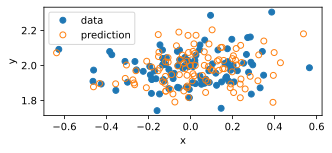

In [ ]:
# in the textbook they call this sigma and it is under "Auxilliary paramater(s)"
sigma_fit = np.sqrt(results.mse_resid)

fig,ax = plt.subplots(figsize=(5,2))
ax.plot(x,y,"o",label="data")

# now let's predict some new data points using the fitted model
x_pred =  np.random.normal(0,0.2,100)
y_pred = a_fit*x_pred + b_fit + np.random.normal(0,sigma_fit,len(x_pred))
ax.plot(x_pred,y_pred,"o",label="prediction",fillstyle="none")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

After fitting a regression model and obtaining the fitted coefficents, there are number of questions we can ask about the quality of the fit, and these often depend on exactly what we are using the results for. Often, we want to access how confident we are in the fitted model. This is often framed as: how likely is it that we would see these particular values of $a$ and $b$, or values greater than these, by chance if, for example, the $x$ and $y$ were not correlated? This question is addressed by $p$-values. There are many different ways to define a $p$-value. For linear regression models, we usually estimate the probability that the slope devided by the standard err is greater than what we observe in the data *if the slope were actually zero*. We can do the same thing for the intercept. In both cases, a very small $p$-value means it's unlikely we would have obtained the fitted coefficient if the actual coefficient was zero. Here is how we get the $p$-value:



In [ ]:
results.pvalues

array([2.42367527e-131, 1.27391217e-001])

We also often want to quantify how much of the variation is explained by the regression line. This is the role of the $R^2$ value. The $R^2$ values is defined as
\begin{equation}
R^2 =1 - \frac{\sum_i r_i^2}{\sum_i(y_i-\bar{y}_i)^2}
\end{equation}
where $r_i$ are the residuals, that is $r_i = y_i - (\hat{a} + \hat{b}x_i)$, and $\bar{y}$ is the sample mean of $y$. Notice that if $R^2$ approachs one, most of the spread in the data can be accounted for by the regression model. That is, it is explained by the relationship between $x$ and $y$. We can get the $R^2$ value as follows:

In [ ]:
results.rsquared

0.023553626688328055

**EXERCISES**

 
1.1 Using the code above, write a function `simulated_data_lr(a,b,sigma,n)` which does the following: First, it generates data from a simulated linear regression with slope `a`, intercept `b`, measurment noise `sigma` and `n` data points. It then performs a linear regression on the simulated data and outputs the estimated slope, intercept, the $R^2$ value and the $p$-value for the slope.
You can generate the $x$ values by copying the code at the beginning of this section and changing $n$. 

1.2 Using your function, make a plot of the p-value vs. n using the values of a, b and sigma from above. Make the same plot with $a = 1.0$, $b = 2$ and $\sigma = 0.1$. Now repeat this but plotting $R^2$ instead of the $p$-values.  Can you explain why the behavoir of these plots makes sense? Hint: It may be helpful to plot the results on a log scale using `ax.semilogy`. 



1.3 Generate data such that performing a linear regression results in a (a) A very small $p$-value and an $R^2$ value close to $1$. (b) A large $p$ value and a very small $R^2$ value. (c) A small $p$-value and a small $R^2$ value. 



In [ ]:
#1.1
def simulated_data_lr(a,b,sigma,n):
  x = np.sort(np.random.normal(0,0.2,n))
  y = a*x + b + np.random.normal(0,sigma,len(x)) 
  X = sm.add_constant(x)
  model= sm.OLS(y,X)
  results = model.fit()
  b_fit,a_fit = results.params
  r2=results.rsquared
  pval=results.pvalues
  #print("Slope: " + str(a_fit) + "\n" + "Intercept: " + str(b_fit) + "\n" + "R^2: " + str(r2) + "\n" + "p-value: " + str(pval[1]) + "\n")
  return a_fit, b_fit, r2, pval[1]

#simulated_data_lr(0.2,2,0.1,100)

#1.2
def plot_params(a,b, sigma, n):
  i_list=[]
  pval_list=[]
  r2_list=[]
  for i in range (2,n):
    a_fit,b_fit,r2,pval= simulated_data_lr(a,b,sigma,i)
    i_list.append(i)
    r2_list.append(r2)
    pval_list.append(pval)

  fig,ax = plt.subplots(figsize=(5,3))
  ax.semilogy(i_list, pval_list, "o")
  ax.set_ylabel("p-values")
  ax.set_xlabel("n")

  fig,ax = plt.subplots(figsize=(5,3))
  ax.semilogy(i_list, r2_list, "o")
  ax.set_ylabel("r2")
  ax.set_xlabel("n")

#plot_params(0.2,2,0.1,200)
#plot_params(1,2,0.1,200)

# This behavior shows that the more data points (n) there are that are correlated, 
# the more likely it is that the two variables are related. In other words, the more data
# points there are, the less likely it is that the variables are not related. This 
# makes sense as the more correlated data points there are, the more information 
# there is to support that they are related. 

# This behavior shows that after a sharp increase, R^2 stays relatively high and 
# slightly decreases over time as n increases. This makes sense as it shows that 
# our model is better able to fit the data after the first few data points and 
# then decreases in its ability to fit the data as more data points are added and 
# variance increases.

#1.3

a_fit, b_fit, r2, pval=simulated_data_lr(1,2,0.05,100)
print("R^2: " + str(r2) + "\n" + "p-value: " + str(pval) + "\n")
a_fit, b_fit, r2, pval=simulated_data_lr(5,3,100,150)
print("R^2: " + str(r2) + "\n" + "p-value: " + str(pval) + "\n")
a_fit, b_fit, r2, pval=simulated_data_lr(0.2,2,0.1,100)
print("R^2: " + str(r2) + "\n" + "p-value: " + str(pval) + "\n")

R^2: 0.9306429642601604
p-value: 1.3612571547800379e-58

R^2: 0.0005506025027540717
p-value: 0.7756283965398082

R^2: 0.13594018361954519
p-value: 0.00016030580689292676



# Example: Election and economy

In this example we will work with the elections and economy dataset from discussed in Chapter 7 of Gelman, Hill and Vehtari. The data set contains the incumbent party's vote share of US presdential elections from 1952 to 2012 along with a measure of economic growth. The idea is that one can do a surprisingly good job of forcasting elections solely based on the state of the economy during the previous presidents term.

In [ ]:
# we start by getting the data from one of the author websites
# we use pandas to read it into a DataFrame object, which is simply
# a nice way to store tabular data
url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
data = pd.read_csv(url,sep="\s+");

# here is what the data looks like
print(data)

    year  growth   vote inc_party_candidate other_candidate
0   1952    2.40  44.60           Stevenson      Eisenhower
1   1956    2.89  57.76          Eisenhower       Stevenson
2   1960    0.85  49.91               Nixon         Kennedy
3   1964    4.21  61.34             Johnson       Goldwater
4   1968    3.02  49.60            Humphrey           Nixon
5   1972    3.62  61.79               Nixon        McGovern
6   1976    1.08  48.95                Ford          Carter
7   1980   -0.39  44.70              Carter          Reagan
8   1984    3.86  59.17              Reagan         Mondale
9   1988    2.27  53.94           Bush, Sr.         Dukakis
10  1992    0.38  46.55           Bush, Sr.         Clinton
11  1996    1.04  54.74             Clinton            Dole
12  2000    2.36  50.27                Gore       Bush, Jr.
13  2004    1.72  51.24           Bush, Jr.           Kerry
14  2008    0.10  46.32              McCain           Obama
15  2012    0.95  52.00               Ob

Text(0, 0.5, 'vote share')

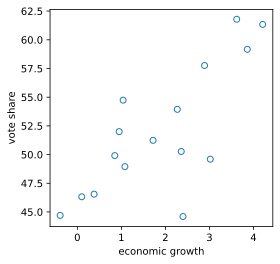

In [ ]:
# in this case our x variable is economic growth 
x = data.growth
y = data.vote

fig,ax = plt.subplots(figsize=(4,4))
ax.plot(x,y,"o",fillstyle="none")
ax.set_xlabel("economic growth")
ax.set_ylabel("vote share")

**EXERCISES**

2.1  Perform a linear regression on vote share vs. economic growth. What is the equation you get for the regression line? (the fit will be slightly different than textbook, since they use Bayesian algorithms from the start.)

2.2 Suppose you wanted to predict the outcome of an election using this model. In order to be at least $85$% confident of your prediction, what would range would the economic growth have to fall in?  That is, you should provide a minumum value of $x$ needed to call the election of the incumbent and a maximum value needed to call the election for the non-incumbent. When answering this question, you should neglect any uncertainty in the fitted model (ignore the ``std err`` values) and your answer only needs to be accurate within a few percent. 


2.3 Generate simulated data to confirm your answer to the previous question. In other words, using the model "simulate" elections for the values of economic growth you computed and show that indeed the incumbent/non-incumbent candidate wins in $85$% of them. 

2.4 Later we will see how to **propogate error** from the uncertainty in the measured coefficents. This means that when making predictions, in addition to taking into account randomness in the model (the $\epsilon_i$ terms), we will take into account that we don't know the exact values of the parameters.  Without doing any math or coding, how do you think including this uncertainty would change the results? It's okay if the answer is wrong, as long as you explain your thought process.

2.5 In the previous example, we applied the linear regression in an idealized sceneario where the data satisfied exactly the assumptions of the linear model. In what ways might this data set violate the assumptions of the linear regression? In particular, why might it be a problem that $y$ is a *fraction* of the votes. Hint: thing about what values a normally distributed random variable can take on.

In [ ]:
#2.1
url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
data = pd.read_csv(url,sep="\s+");

x = data.growth
y = data.vote

X = sm.add_constant(x)
model= sm.OLS(y,X)
results = model.fit()
b_fit,a_fit = results.params
#print(results.summary())

# The equation I got was y=3.0625x+46.2476

# 2.3
b_fit,a_fit = results.params
sigma_fit = np.sqrt(results.mse_resid)
print(sigma_fit)

sim_vote =  np.random.normal(2.5 *a_fit + b_fit,sigma_fit,1000000)

len(sim_vote[sim_vote>50])/len(sim_vote)


3.7632876422297947


0.149708

2.2 The range is 0 to 2.5. At 0, the nonincumbent will win 85% of the time and at 2.5 the incumbent will win 85% of the time. We determined this through simulations and guess and check, as we knew the higher the economic growth, the more likely it was that they won. The reason we got 0 was because the incumbent is more likely to win than the nonincumbent, so even a very small amount of economic growth will ensure a win for the incumbent and economic growth of 0 will create 85% confidence in a win for the nonincumbent. The reason we got 2.5 is because the point where the one standard deviation (sigma_fit) below the mean (a_fit*x+b_fit) is above 50 is about 85% confidence, and this is about 2.5.

2.4. We think it will change the results only slightly. This is because if the fitted line does not pass through the data correctly and if there is variation in the slope and intercepts of the fitted line, then the x or economic growth that it takes to win is inaccurate and will change. If the slope or a_fit is bigger, then it will take less economic growth for the incumbent to win and if the slope or a_fit is smaller, then it will take more economic growth for the incumbent to win. Such changes occur for y-intercept as well. If the y-intercept or b-fit is bigger, then it will take less economic growth to win and vice versa.

2.5 This data set may not satisfy the assumptions of liner regression, as they may not follow normal distribution. Normal distribution allows y or vote share to have data points that are negative or over 100. However, this data set is bounded form 0 to 100, as vote shares are a percentage. Thus, normal distribution does not work perfectly for this data set.

# Example: Test scores and mother education



So far we have been working with regression problems where the predictor variables (x) are continous, that is, they are decimal numbers. It's comment however to make preditions based on discrete variables. For example, we might want to understand how the efficacy of a drug depends on the sex of a patient. Such variables are sometimes called **idicator variables**. Everything we've done actually generalizes very easily to this setting -- remember, there was nothing in our model that assumes $x$ is continous. 

To illusrate this, we will work with a data consisting of kids test scores and their mother's high school education (whether they graduated or not). Acutally, there is more information in this data set, but for now, we will only focus on this one variable. 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/KidIQ/data/kidiq.csv")

In [ ]:
print(data)

     kid_score  mom_hs      mom_iq  mom_work  mom_age
0           65       1  121.117529         4       27
1           98       1   89.361882         4       25
2           85       1  115.443165         4       27
3           83       1   99.449639         3       25
4          115       1   92.745710         4       27
..         ...     ...         ...       ...      ...
429         94       0   84.877412         4       21
430         76       1   92.990392         4       23
431         50       0   94.859708         2       24
432         88       1   96.856624         2       21
433         70       1   91.253336         2       25

[434 rows x 5 columns]


In [ ]:
# there is more information here, but let's start by just looking at 
# how the mother's high school education correlates with scores
x = np.array(data["mom_hs"])
y = np.array(data["kid_score"])

model= sm.OLS(y,sm.add_constant(x)) 
 # and this commend actually does the computations which give the results
results = model.fit()

# as expected everything works just the same as before
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           5.96e-07
Time:                        20:05:30   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.5484      2.059     37.670      0.0

Plotting this data is a little different than we are used to with continous predictors. If we just plot as usual, we get something that is a little difficult to interpret. Instead, we will use a boxplot.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[]

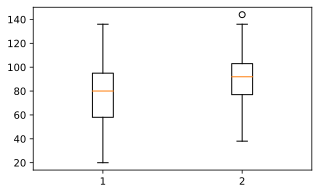

In [ ]:
fig,ax = plt.subplots(figsize=(5,3))
plt.boxplot([y[x ==0],y[x ==1]]);

b_fit,a_fit = results.params
plt.plot()

In [ ]:
results.rsquared

0.05612939624873492

**EXERCISES**

3.1 The model predicts that, on average, children of mothers who graduated high school will perform better on tests. But if we select a random child from a mother who graduated high school, how likely is it that they perform better than a random child from a mother who did not attend high school? Note we are asking about the model prediction, not the chance of this happening in the actual sampled data. You can answer this question by generating random data from the model, or using what you know about the Normal distribution.

3.2 Comment on (i) whether you believe there is a real effect of mother education on the kids test scores and (ii) the size of this effect. What role do the $R^2$ value and $p$-values play in your interpretation. 



In [ ]:
# 3.1

sigma_fit = np.sqrt(results.mse_resid)

# simulate test data for kids who had mothers that graduated high school
sim_score1 =  np.random.normal(1*a_fit + b_fit,sigma_fit,1000000)

# simulate test data for kids who did not have mothers that graduated high school
sim_score0 =  np.random.normal(0*a_fit + b_fit,sigma_fit,1000000)

# counts how many kids w mothers who graduated high school had higher test scores than those who did not
count = 0
for n in range(len(sim_score1)):
  if sim_score1[n] > sim_score0[n]:
    count += 1

print(count/len(sim_score1))

# 66% of the time, the child of a mother who did attend high school had higher IQs.

3.1 We believe it is pretty likely that they perform better than a child of a mother who did not attend high school. This is because the IQs of children whos' parents went to high school have a higher mean and standard deviation than the children whos' parents did not go to high school. Thus, that means for the children with parents who went to high school, since the data is normally distributed, they have a higher average IQ and more kids have IQs clustered near this higher average IQ. In addition, through simulation, we determined thaqt 66% of the time, IQs are higher for these children.

3.2 I think a mothers education influences kids test scores but does not have a perfect linear correlation. I think this makes sense as the low p value shows that this is statistically significant but the low R^2 value shows that there is lots of variance.